In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [27]:
import tensorflow as tf

In [28]:
from keras.models import Sequential  
from keras.layers import Dense
from keras.optimizers import Adam

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
dataset = pd.read_csv('combined_data.dat', sep="\s+", header=None)
dataset.columns =["COMPACTNESS","CIRCULARITY","DISTANCE CIRCULARITY","RADIUS RATIO","PR.AXIS ASPECT RATIO",
                      "MAX.LENGTH ASPECT RATIO","SCATTER RATIO","ELONGATEDNESS","PR.AXIS RECTANGULARITY",
                       "MAX.LENGTH RECTANGULARITY","SCALED VARIANCE ALONG MAJOR AXIS","SCALED VARIANCE ALONG MINOR AXIS",
                      "SCALED RADIUS OF GYRATION","SKEWNESS ABOUT MAJOR AXIS","SKEWNESS ABOUT MINOR AXIS",
                      "KURTOSIS ABOUT MINOR AXIS","KURTOSIS ABOUT MAJOR AXIS","HOLLOWS RATIO","vehicle_type"]
dataset

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO,vehicle_type
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [31]:
# Get all the attributes
X = dataset.iloc[:, 0:18].values
y = dataset.iloc[:,18].values
y

array(['van', 'van', 'saab', 'van', 'bus', 'bus', 'bus', 'van', 'van',
       'saab', 'van', 'saab', 'bus', 'van', 'bus', 'opel', 'van', 'bus',
       'saab', 'opel', 'bus', 'van', 'bus', 'bus', 'saab', 'van', 'saab',
       'saab', 'bus', 'saab', 'van', 'saab', 'opel', 'opel', 'opel',
       'van', 'bus', 'van', 'saab', 'bus', 'opel', 'van', 'van', 'saab',
       'saab', 'van', 'van', 'bus', 'van', 'saab', 'saab', 'saab', 'opel',
       'bus', 'bus', 'van', 'saab', 'van', 'opel', 'van', 'opel', 'opel',
       'van', 'bus', 'bus', 'opel', 'bus', 'opel', 'van', 'bus', 'opel',
       'opel', 'opel', 'opel', 'van', 'opel', 'saab', 'saab', 'bus',
       'bus', 'bus', 'bus', 'van', 'opel', 'bus', 'bus', 'van', 'van',
       'bus', 'opel', 'saab', 'opel', 'saab', 'van', 'bus', 'opel',
       'saab', 'bus', 'opel', 'bus', 'bus', 'van', 'van', 'van', 'bus',
       'saab', 'opel', 'opel', 'bus', 'bus', 'van', 'van', 'opel', 'opel',
       'van', 'van', 'opel', 'saab', 'bus', 'bus', 'saab', 'van

In [32]:
encoder = LabelEncoder()
y_class = encoder.fit_transform(y) # Convert an array of strings to an array of integers
y_class

array([3, 3, 2, 3, 0, 0, 0, 3, 3, 2, 3, 2, 0, 3, 0, 1, 3, 0, 2, 1, 0, 3,
       0, 0, 2, 3, 2, 2, 0, 2, 3, 2, 1, 1, 1, 3, 0, 3, 2, 0, 1, 3, 3, 2,
       2, 3, 3, 0, 3, 2, 2, 2, 1, 0, 0, 3, 2, 3, 1, 3, 1, 1, 3, 0, 0, 1,
       0, 1, 3, 0, 1, 1, 1, 1, 3, 1, 2, 2, 0, 0, 0, 0, 3, 1, 0, 0, 3, 3,
       0, 1, 2, 1, 2, 3, 0, 1, 2, 0, 1, 0, 0, 3, 3, 3, 0, 2, 1, 1, 0, 0,
       3, 3, 1, 1, 3, 3, 1, 2, 0, 0, 2, 3, 3, 2, 3, 3, 0, 0, 3, 0, 2, 2,
       2, 3, 1, 3, 3, 3, 2, 3, 2, 0, 1, 0, 1, 1, 3, 0, 2, 3, 2, 0, 1, 2,
       3, 0, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 3, 1, 0, 3, 0, 3, 0,
       1, 0, 0, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 3, 2, 0, 2, 0, 2, 0,
       0, 0, 3, 2, 1, 1, 3, 3, 1, 0, 0, 1, 1, 3, 0, 0, 1, 1, 2, 1, 0, 3,
       1, 3, 0, 0, 2, 3, 2, 3, 2, 2, 3, 2, 0, 2, 3, 3, 0, 0, 1, 0, 1, 1,
       0, 2, 3, 3, 0, 2, 1, 2, 3, 1, 3, 0, 3, 2, 2, 1, 2, 1, 2, 2, 3, 3,
       2, 0, 0, 2, 3, 3, 0, 2, 3, 3, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 3, 2,
       0, 3, 1, 2, 3, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2,

In [33]:
Y = pd.get_dummies(y_class).values # Finally, y_class is transformed into the array structure needed for the neural network
Y

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [34]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [35]:
# Reserve 20% samples for validation
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [36]:
model = Sequential([
        Dense(64, activation='relu', input_shape=(18,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(4, activation='softmax')
    ])

In [37]:
model.compile(Adam(learning_rate=0.001), 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                1216      
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)               

In [38]:
# Early stopping can be used to prevent overfitting by intercepting the model throughout the training process 
# to save the parameter model with the best results.
early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=50, 
    min_delta=0.001, 
    mode='max'
)

In [39]:
# Fit the training data into the model
history = model.fit(X_train, y_train, validation_data=(x_val,y_val), epochs=500, batch_size=8,
    callbacks=[early_stopping])

Epoch 1/500
68/68 [==============================] - 2s 12ms/step - loss: 1.7521 - accuracy: 0.3093 - val_loss: 1.3625 - val_accuracy: 0.4265
Epoch 2/500
68/68 [==============================] - 0s 3ms/step - loss: 1.2859 - accuracy: 0.3833 - val_loss: 1.1153 - val_accuracy: 0.4632
Epoch 3/500
68/68 [==============================] - 0s 3ms/step - loss: 1.2151 - accuracy: 0.4315 - val_loss: 1.2632 - val_accuracy: 0.3824
Epoch 4/500
68/68 [==============================] - 0s 3ms/step - loss: 1.1588 - accuracy: 0.4593 - val_loss: 1.1028 - val_accuracy: 0.4853
Epoch 5/500
68/68 [==============================] - 0s 3ms/step - loss: 1.2277 - accuracy: 0.4630 - val_loss: 1.2600 - val_accuracy: 0.3971
Epoch 6/500
68/68 [==============================] - 0s 4ms/step - loss: 1.2093 - accuracy: 0.4278 - val_loss: 1.1081 - val_accuracy: 0.4853
Epoch 7/500
68/68 [==============================] - 0s 3ms/step - loss: 1.1133 - accuracy: 0.4926 - val_loss: 1.0807 - val_accuracy: 0.4779
Epoch 8/500


In [40]:
# Evaluate the model on the training data
scores = model.evaluate(X_train, y_train)
print("Training %s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("Training %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.7759
Training loss: 51.57%
Training accuracy: 77.59%


In [41]:
# Evaluate the model on the test data
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("Test %s: %.2f%%" % (model.metrics_names[0], results[0]*100))
print("Test %s: %.2f%%" % (model.metrics_names[1], results[1]*100))

Evaluate on test data
2/2 [==============================] - 0s 4ms/step - loss: 0.5282 - accuracy: 0.7588
Test loss: 52.82%
Test accuracy: 75.88%


In [42]:
# Generate predictions (probabilities -- the output of the last layer) on the test data
y_pred = (model.predict(X_test) > 0.5).astype("uint8")
y_pred

6/6 [==============================] - 0s 2ms/step


array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0,

In [43]:
# save the model
model.save('model.h5')

In [44]:
# draw the image for training and validation loss
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

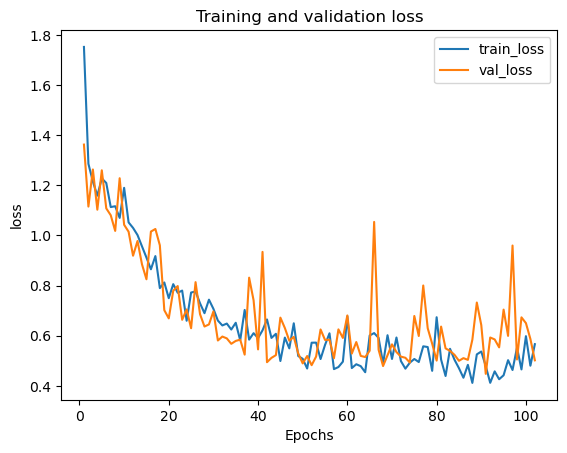

In [45]:
plot_metric(history, 'loss')

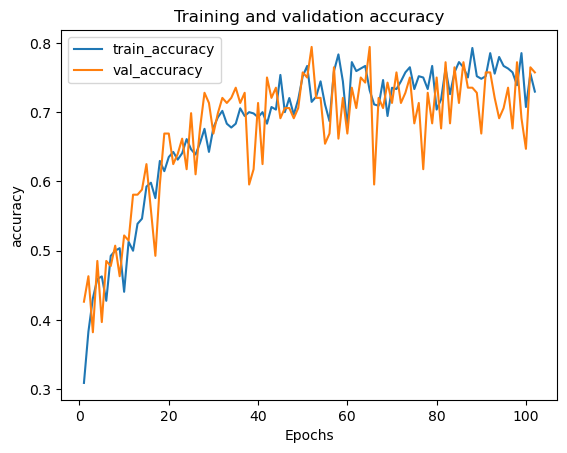

In [46]:
plot_metric(history, 'accuracy')

In [47]:
# === Confusion matrix: true versus predicted values ===
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
nn_confusion_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [48]:
nn_confusion_matrix_norm = nn_confusion_matrix.astype('float') / nn_confusion_matrix.sum(axis=1)[:, np.newaxis]     # Normalisation
nn_confusion_matrix_norm = np.around(nn_confusion_matrix_norm, decimals=2)

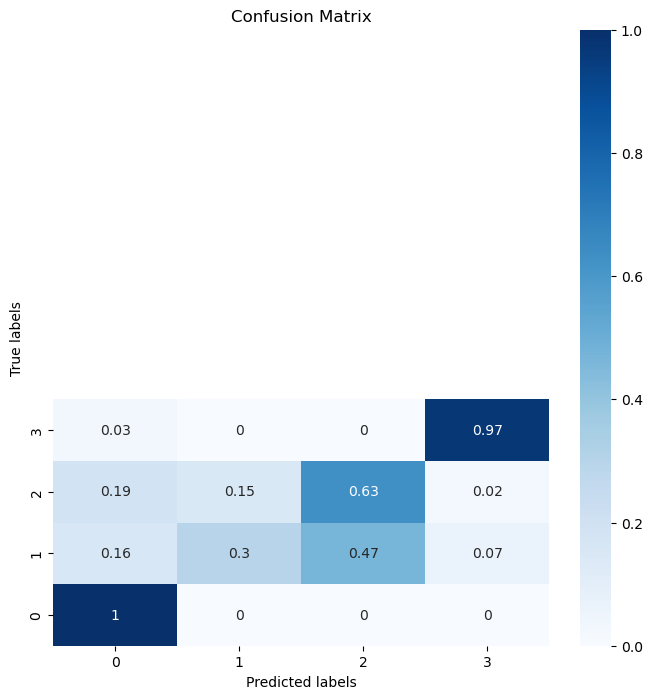

In [49]:
# === plot ===
plt.figure(figsize=(8, 8))
sns.heatmap(nn_confusion_matrix_norm, annot=True, cmap='Blues')

plt.ylim(0, 10)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix'); 
plt.show()